# ZOC GROUP OF COMPANIES - CUSTOMER CHURN PREDICTION

## Importing libaries

In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Installations and settings

In [3]:
# pip install xgboost

In [4]:
# pip install seaborn --upgrade

In [5]:
# conda install -c conda-forge mlxtend

In [6]:
# pip install imbalanced-learn

In [7]:
# setting up default plotting parameters
%matplotlib inline 
plt.rcParams['figure.figsize'] = [20.0, 9.0]
plt.rcParams.update({'font.size': 22,})

sns.set_palette('viridis') 
sns.set_style('darkgrid') 
sns.set_context('talk', font_scale=0.8)

## Loading the Dataset

In [8]:
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

In [22]:
train_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15804610,Valdez,601,France,Female,41,1,0.00,2,0,1,160607.06,0
1,15574523,Cheng,576,France,Male,39,1,0.00,2,1,1,68814.23,0
2,15587443,Akudinobi,728,France,Female,69,1,0.00,2,1,1,131804.86,0
3,15768682,Amies,640,Spain,Male,39,3,0.00,1,1,1,105997.25,0
4,15569682,Leckie,768,Germany,Male,37,9,108308.11,1,1,0,41788.25,1


In [23]:
test_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15642544,Henderson,723,France,Male,34,5,0.00,2,0,1,12092.03
1,15779492,Trevisano,796,Spain,Male,56,6,94231.13,1,0,0,121164.60
2,15815271,Ritchie,755,Germany,Male,43,6,165048.50,3,1,0,16929.41
3,15582591,Chiabuotu,615,Spain,Male,59,4,155766.05,1,1,1,110275.17
4,15595937,Bruno,430,Germany,Male,36,1,138992.48,2,0,0,122373.42


### Viewing the number of rows and culumns in the data sets

In [24]:
test_data.shape

(3000, 12)

In [26]:
train_data.shape

(7000, 13)

In [123]:
#Viewing colums in the trai_data in list form
train_data.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [11]:
#Summing the missing values in the train data
train_data.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
#Summing the missing values in the test data
test_data.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

There are no missing values(Null/NaN) in the datasets

## Encoding the non-numeric variables
Here, i will be converting variables of labels with non-numeric values to numerical value.
> Machine learning models can only work with numeric data

Machine learning models work very well for dataset having only numbers. But how do we handle text information in dataset? Simple approach is to use interger or label encoding but when categorical variables are nominal, using simple label encoding can be problematic. One hot encoding is the technique that can help in this situation. 
> Since we are dealing with nominal variable(variables with no particulare odering of which is greater or less than the other) as opposed to ordinal variables(variables with hierachy). 

<img src='Categorical Numeric.png'>

### Encoding The nominal variables using dummy variable 
A good explanation of this is when a machine trains with a particular set of variable eg. Male and female, it is beter to have a male lable as (1 as Male and ) as Feamle) as opposed to 1 for Male and 2 for Female (which dont mean anything really). 
>This process of encoding categorical variables is known as One hot encoding.

In [9]:
# For hot encoding, we will need to create dummy variables
dummies = pd.get_dummies(train_data.Gender)
dummies3 = pd.get_dummies(test_data.Gender)

In [10]:
dummies2 = pd.get_dummies(train_data.Geography)
dummies4 = pd.get_dummies(test_data.Geography)

In [11]:
#Merging the features in our train data with the dummies of encoded Geograpy and Gender columns
merged_train = pd.concat([train_data, dummies, dummies2], axis='columns')
merged_test = pd.concat([test_data, dummies3, dummies4], axis='columns')
merged_train

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male,France,Germany,Spain
0,15804610,Valdez,601,France,Female,41,1,0.00,2,0,1,160607.06,0,1,0,1,0,0
1,15574523,Cheng,576,France,Male,39,1,0.00,2,1,1,68814.23,0,0,1,1,0,0
2,15587443,Akudinobi,728,France,Female,69,1,0.00,2,1,1,131804.86,0,1,0,1,0,0
3,15768682,Amies,640,Spain,Male,39,3,0.00,1,1,1,105997.25,0,0,1,0,0,1
4,15569682,Leckie,768,Germany,Male,37,9,108308.11,1,1,0,41788.25,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,15628999,Townsend,732,France,Male,79,10,61811.23,1,1,1,104222.80,0,0,1,1,0,0
6996,15661708,She,508,France,Female,41,5,0.00,2,1,1,94170.84,0,1,0,1,0,0
6997,15593900,Belousov,705,France,Male,38,1,189443.72,1,0,1,106648.58,0,0,1,1,0,0
6998,15570087,Parry-Okeden,664,France,Female,44,8,142989.69,1,1,1,115452.51,1,1,0,1,0,0


Droping from Unessary data **('Surname', 'CustomerId')** and redundant data**('Geography', 'Gender')** due to the merge with dummies 

In [12]:
merged_train.drop(['Surname', 'CustomerId', 'Geography', 'Gender'], axis = 1, inplace=True)
merged_test.drop(['Surname', 'CustomerId', 'Geography', 'Gender'], axis = 1, inplace=True)

In [13]:
# feature selected from merged data for outlier removal
merged_train_features = merged_train[['Exited', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember','EstimatedSalary', 'Female', 'Male', 'France', 'Germany', 'Spain']]
merged_train_features

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Female,Male,France,Germany,Spain
0,0,601,41,1,0.00,2,0,1,160607.06,1,0,1,0,0
1,0,576,39,1,0.00,2,1,1,68814.23,0,1,1,0,0
2,0,728,69,1,0.00,2,1,1,131804.86,1,0,1,0,0
3,0,640,39,3,0.00,1,1,1,105997.25,0,1,0,0,1
4,1,768,37,9,108308.11,1,1,0,41788.25,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,0,732,79,10,61811.23,1,1,1,104222.80,0,1,1,0,0
6996,0,508,41,5,0.00,2,1,1,94170.84,1,0,1,0,0
6997,0,705,38,1,189443.72,1,0,1,106648.58,0,1,1,0,0
6998,1,664,44,8,142989.69,1,1,1,115452.51,1,0,1,0,0


In [214]:
# features for rest of EDA
features = merged_train [['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember','EstimatedSalary', 'Female', 'Male', 'France', 'Germany', 'Spain']]

In [215]:
# target for rest of EDA
target = train_data['Exited']

# Exploratory Data Analysis (EDA)
Exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. 
EDA in Python uses data visualization to draw meaningful patterns and insights. It also involves the preparation of data sets for analysis by removing **irregularities** in the data.

# Identifying Outliers
Outliers are unusual data points that differ significantly from rest of the samples. They can occur due to an error in data collection process or they are just legitimate data points and represent natural variation.
> Outliers are **irregularities**, which cause **overfiting** in the prediction with a dataset where they appear.

### ways of identifying oultliers by: 
- Data visualization analysis
 - **histogram**, 
 - **box plots**, 
 - **scatter plots**, 
 - **residual values**, 
 - **Cook’s distance**
- Analysing statistical summary
 - **Pecentile approach**
 - **IQR**
 - **Z Score** or **standard deviation**

## Data visualization

**Identifying the important features in my data set to aid with further analysis**

[0.13619817 0.2330081  0.10613963 0.12999587 0.14547548 0.02375111
 0.0414384  0.13334374 0.00658529 0.00747466 0.00828084 0.02132352
 0.00698519]


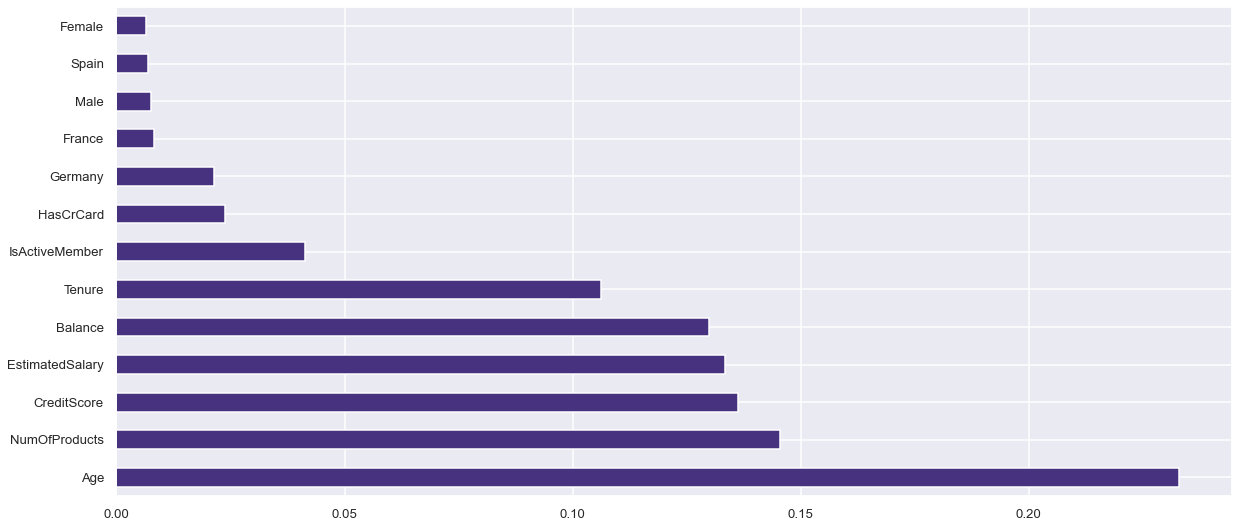

In [262]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(features, target)
print(model.feature_importances_)
feat_importance = pd.Series(model.feature_importances_,index=features.columns)
feat_importance.nlargest(14).plot(kind = 'barh')
plt.show()

The Diagram above shows each of the features and their level of importance using an extra tree classifier model

[2.61791414e-02 3.88318365e-01 1.88504642e-03 7.29553611e-02
 2.91436578e-01 4.77723765e-05 1.32810225e-01 2.39603027e-02
 6.35091276e-03 5.91976547e-03 1.06338022e-03 4.88277935e-02
 2.45356827e-04]


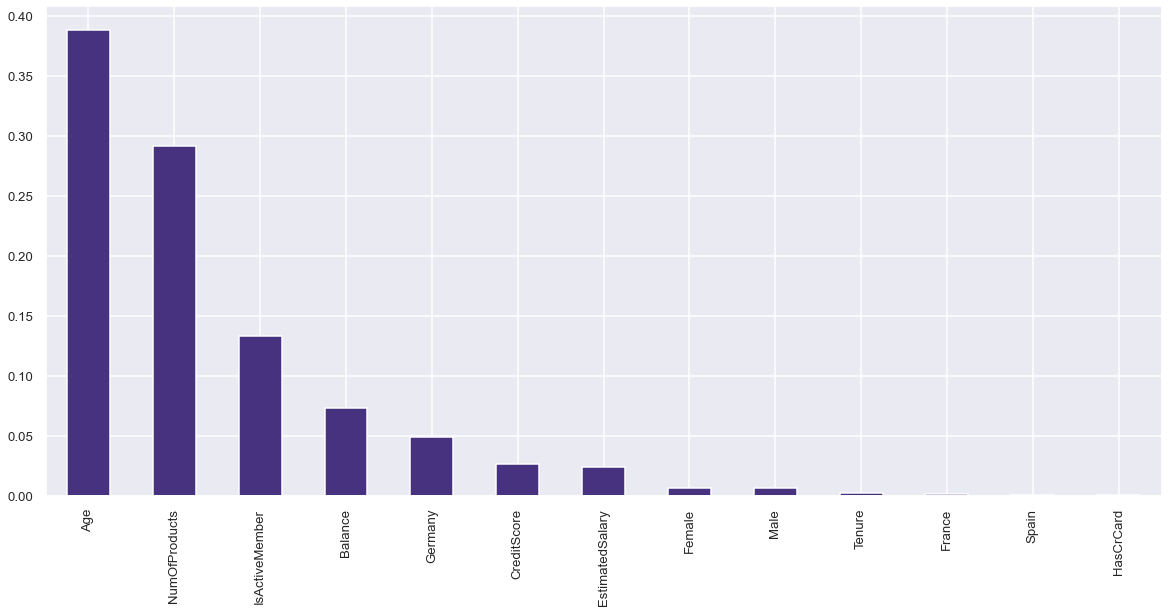

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(features, target)
print(model.feature_importances_)
feat_importance = pd.Series(model.feature_importances_,index=features.columns)
feat_importance.nlargest(14).plot(kind = 'bar')
plt.show()

The Diagram above shows each of the features and their level of importance using an Gradient Boosting classifier model

### Histogram 
A histogram is a common plot to visualize the distribution of a numerical variable. In a histogram, the data is split into intervals also called bins. 
>Each bar’s height represents the frequency of data points within each feature.

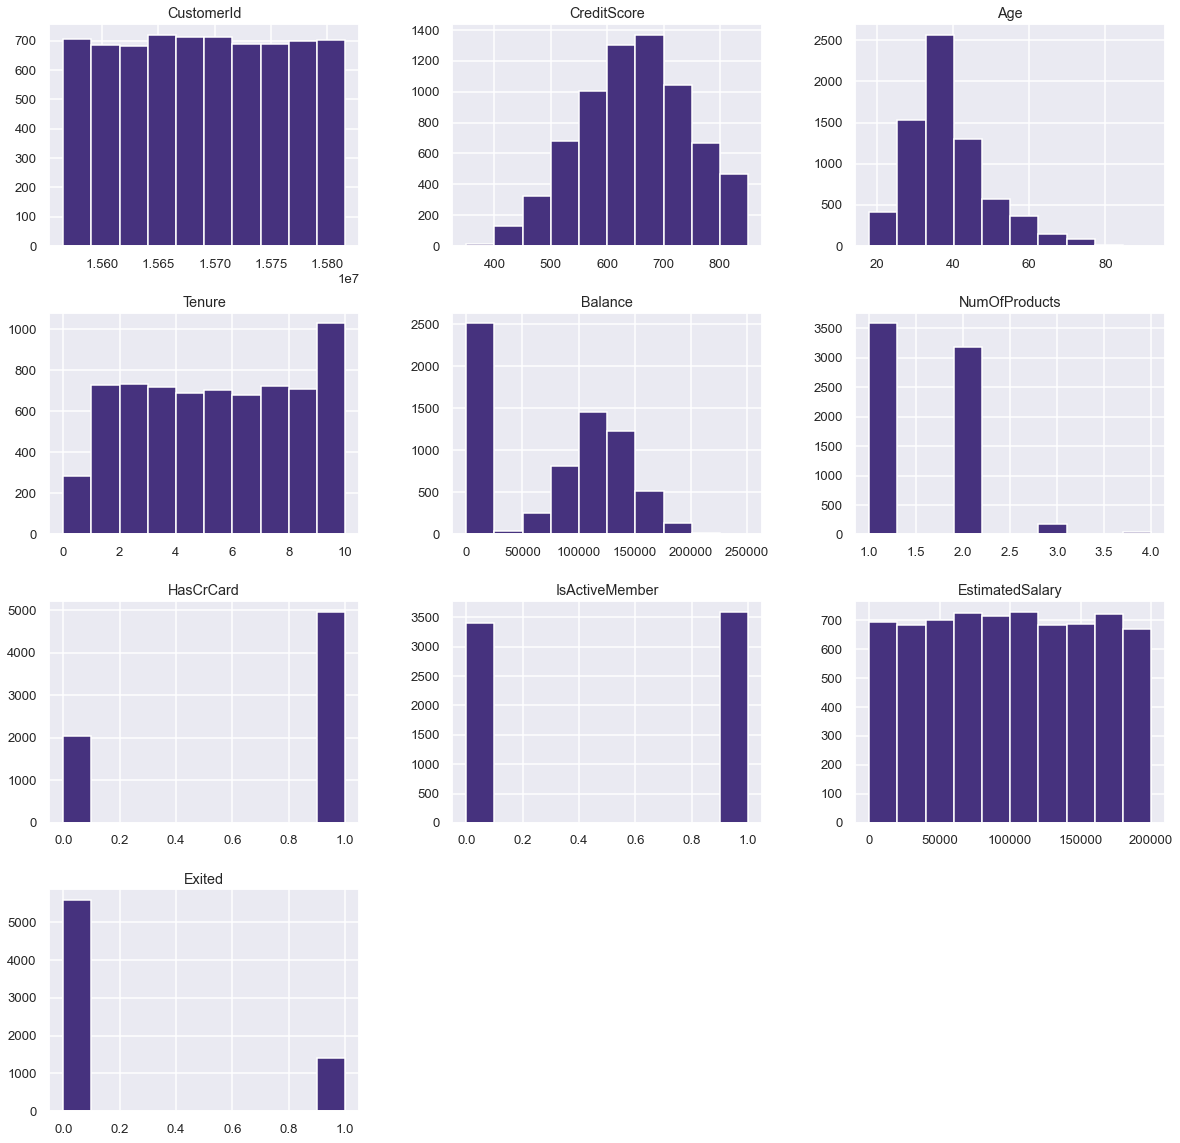

In [7]:
train_data.hist(figsize=(20,20))
plt.show()

From the histogram, we can tell that the possible outliers are those considerably lower than the rest of the values.

>From the Histogram representing The features Balance, we can see that about 2500 customers have a balance of 0 and a minority of the values above 250,000.

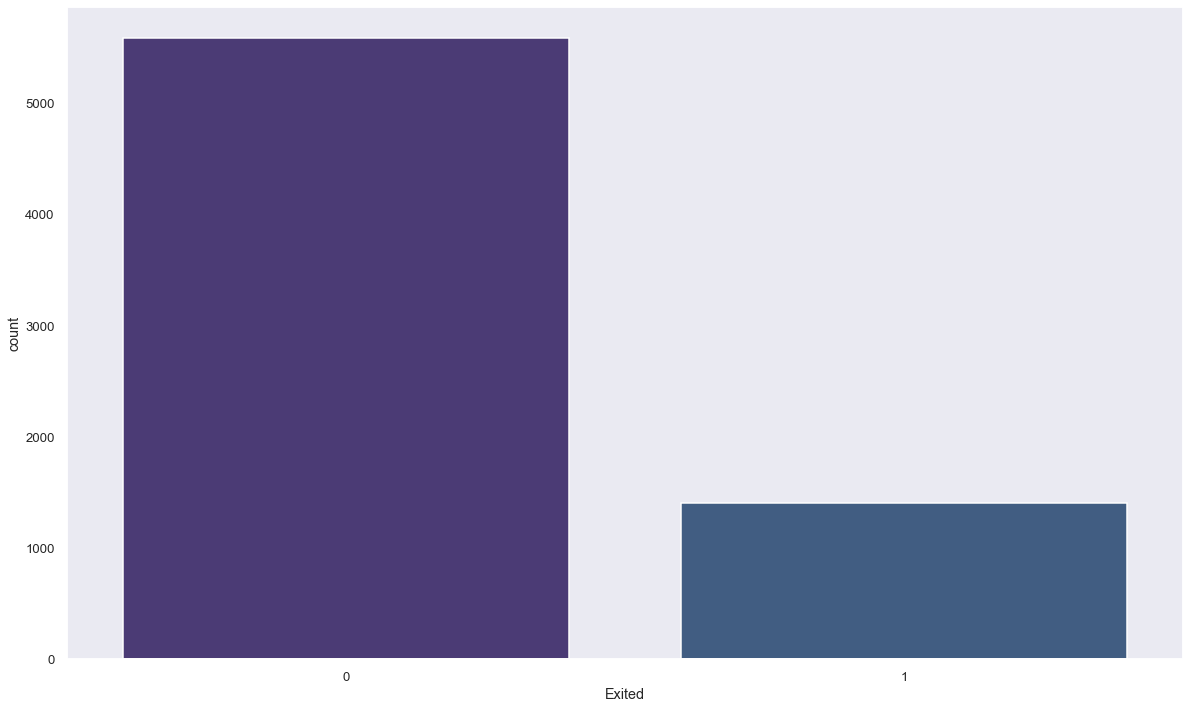

In [40]:
sns.countplot( x = 'Exited' , data = train_data)
plt.show()

### Box plot
Box plots visually show the **distribution** of numerical data and **skewness** through displaying the data **quartiles** (or percentiles) and averages.

<AxesSubplot:xlabel='Exited', ylabel='Age'>

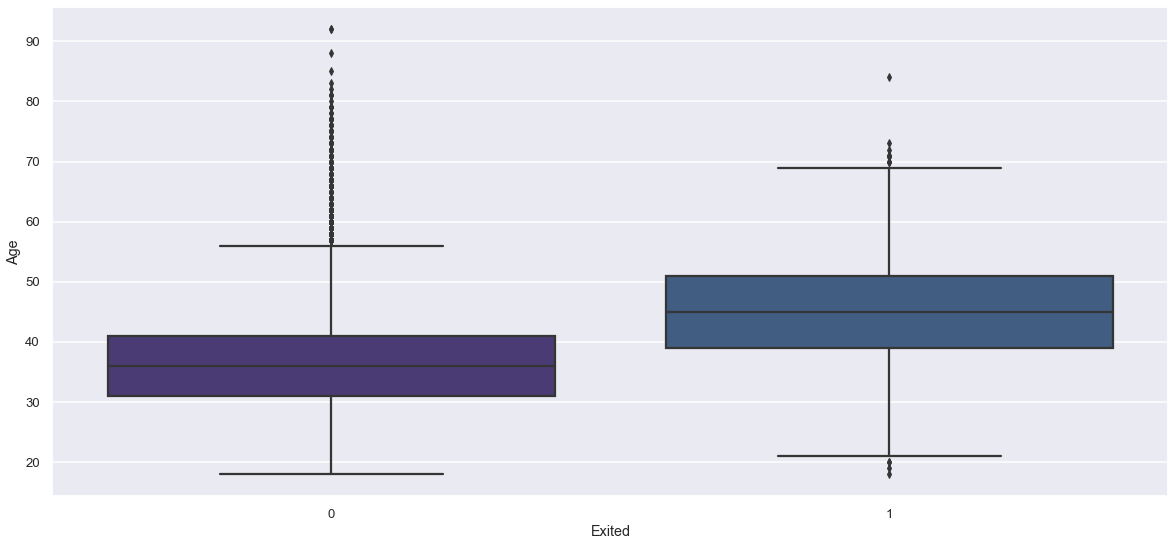

In [179]:
# box plot of the variable Age
sns.boxplot(x = 'Exited', y = 'Age', data = train_data)

In [ ]:
Here we can see th

### Scatter Plot
A scatter plot (scatter chart, scatter graph) uses **dots** to represent values for **two** different numeric variables, on the X and Y coordinates of a Cartesian plane.

Text(0.5, 1.0, 'Distribution of ages')

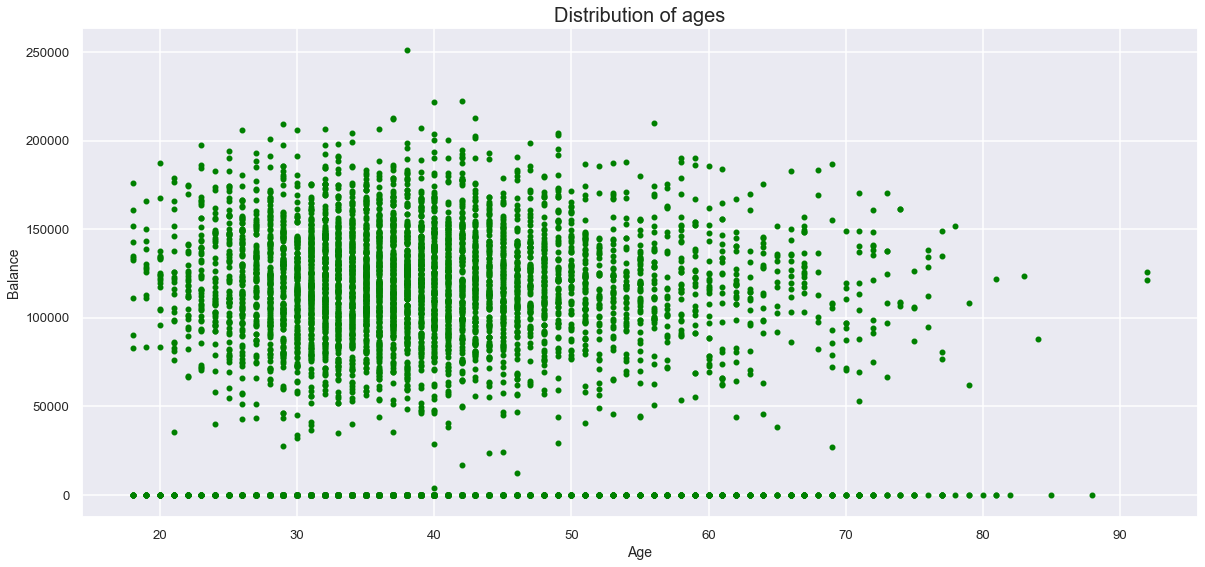

In [180]:
# scatterplotting the Customers to see the outliers

import matplotlib.pyplot as plt
train_data.plot(kind='scatter', x='Age', y='Balance', alpha=1, color='green')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Balance', fontsize=14)
plt.title('Distribution of ages', fontsize=20)

From the scater graph, we can deduce possible outliers from bot age and balance 
>Estimated salary above the 250,000 mark, and ages after 80 years old

### Correlation

correlation is any statistical relationship, whether causal or not, between two random variables. We can plot correlation matrix to show which variable is having a high or low correlation in respect to another variable.
> It is important to note that correlation coefficients only measure linear correlations.

In [130]:
train_data.corr()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,1.000000,0.008499,0.009929,-0.018993,-0.021439,0.011442,-0.019029,-0.011828,0.032816,-0.007060
CreditScore,0.008499,1.000000,-0.002511,-0.006013,0.002181,0.008048,-0.008505,0.026724,-0.007756,-0.032201
Age,0.009929,-0.002511,1.000000,0.001982,0.019424,-0.030046,-0.014927,0.085195,0.009270,0.288732
Tenure,-0.018993,-0.006013,0.001982,1.000000,0.001221,-0.003052,0.025304,-0.025239,0.007210,-0.009668
Balance,-0.021439,0.002181,0.019424,0.001221,1.000000,-0.303379,-0.009317,-0.010813,0.018277,0.111493
NumOfProducts,0.011442,0.008048,-0.030046,-0.003052,-0.303379,1.000000,0.009249,0.008045,0.015463,-0.040043
HasCrCard,-0.019029,-0.008505,-0.014927,0.025304,-0.009317,0.009249,1.000000,-0.020230,-0.010966,-0.008701
IsActiveMember,-0.011828,0.026724,0.085195,-0.025239,-0.010813,0.008045,-0.020230,1.000000,-0.018574,-0.167725
EstimatedSalary,0.032816,-0.007756,0.009270,0.007210,0.018277,0.015463,-0.010966,-0.018574,1.000000,0.016426
Exited,-0.007060,-0.032201,0.288732,-0.009668,0.111493,-0.040043,-0.008701,-0.167725,0.016426,1.000000


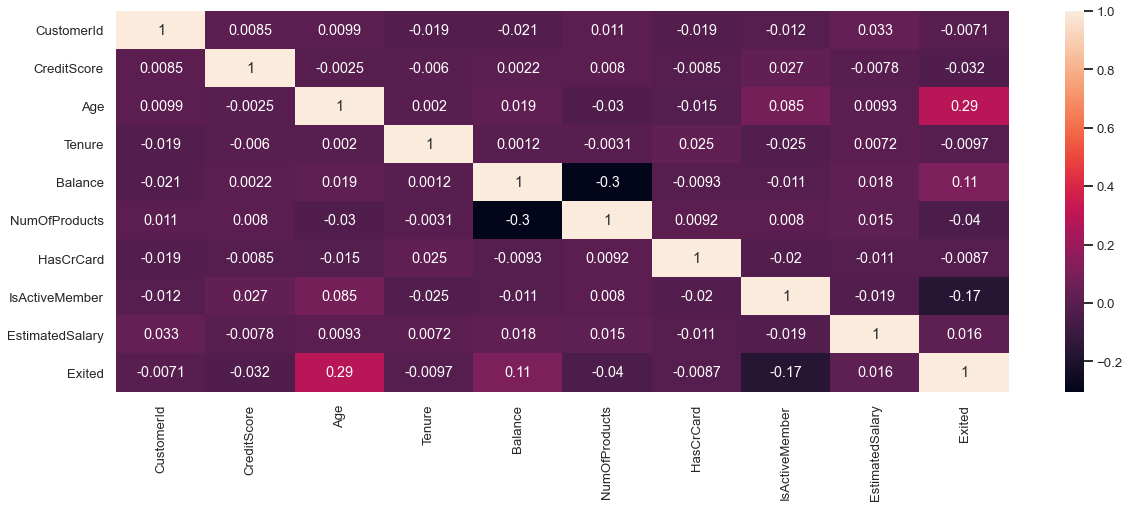

In [131]:
sns.heatmap(train_data.corr(), annot=True)
plt.show()

## Pearson Correlation of Features

 Pearson's Correlation method is used for finding the association between the continuous features and the class feature. 
>It is also used for finding the feature- feature correlation to remove redundant feature.

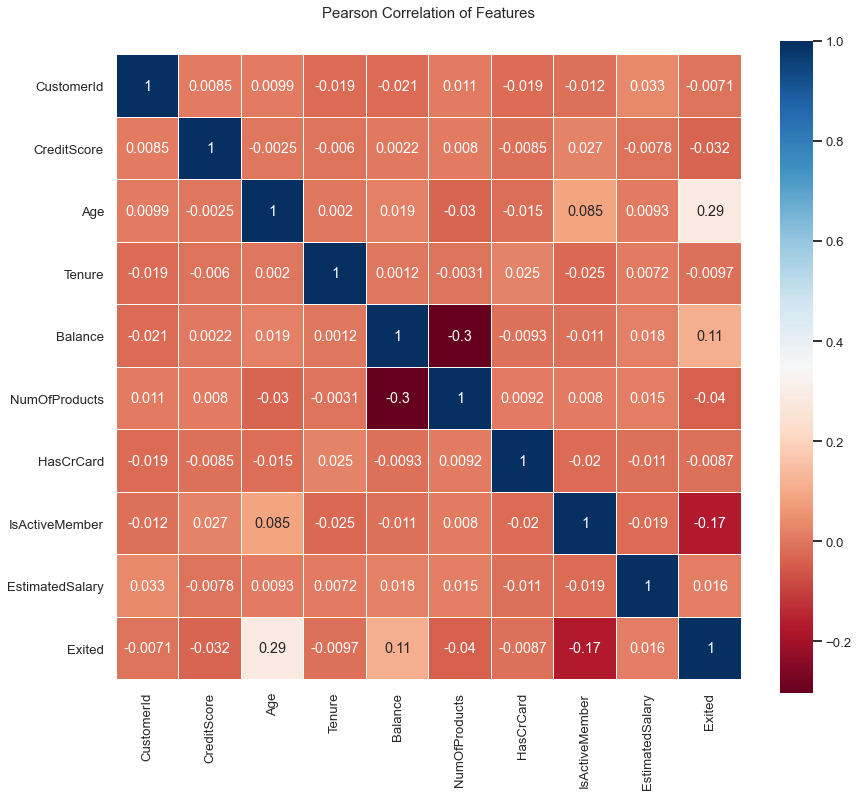

In [132]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_data.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

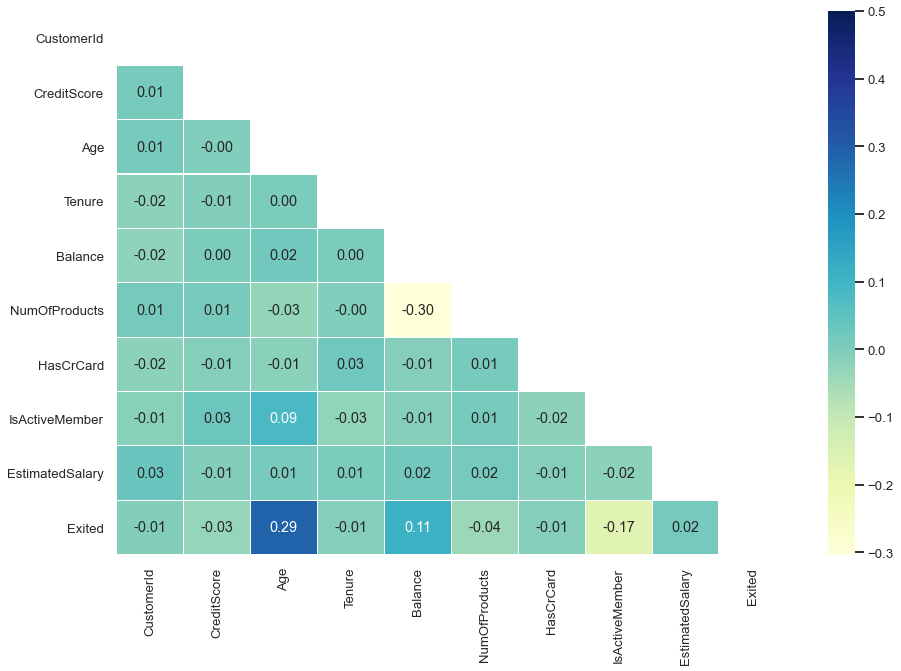

In [133]:
# To Calculate correlations
corr = train_data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap Representation
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
             annot=True, fmt='.2f',
            linewidths=.2, cmap="YlGnBu")
plt.show()

In [272]:
# Find correlations with the target and sort
correlations = train_data.corr()['Exited'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 CustomerId        -0.007060
EstimatedSalary    0.016426
Balance            0.111493
Age                0.288732
Exited             1.000000
Name: Exited, dtype: float64

Most Negative Correlations: 
 IsActiveMember   -0.167725
NumOfProducts    -0.040043
CreditScore      -0.032201
Tenure           -0.009668
HasCrCard        -0.008701
Name: Exited, dtype: float64


## Analysing statistical summary

In [6]:
# Getting the summary statistics of the data
train_data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,7.000000e+03,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,1.569078e+07,649.424000,38.932857,5.008143,77006.866360,1.525857,0.709286,0.514429,99783.685516,0.201429
std,7.191100e+04,97.478815,10.467815,2.891734,62392.609703,0.582318,0.454124,0.499827,57358.455381,0.401096
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,90.070000,0.000000
25%,1.562847e+07,582.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50957.302500,0.000000
50%,1.569053e+07,651.000000,37.000000,5.000000,97529.180000,1.000000,1.000000,1.000000,99594.475000,0.000000
75%,1.575333e+07,716.000000,44.000000,7.000000,127942.495000,2.000000,1.000000,1.000000,149462.720000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199953.330000,1.000000


From the statistical summary, we can see that:
   > - The minimum vale for EstimatedSalary is 90.07 which is considerably less than the rest of the values. this depicts the possiblity of outliers present in this label of the dataset 
   > - Also we can see that the maximum age is 92, which considerably higher than the majority. Alhough it is realistict to have a 92 year old customer, because they are far off from the rest of the data, it can skew the prediction and decrease accuracy.
   >- For Balance, we have the max value considerably higher than the 75th percentile and majority of the values in the column of the dataset as well

# Detecting and Removing Outliers

### Age Outliers

In [134]:
# Possible Age Outliers Using Percentile
min_thresold, max_thresold = merged_train_features.Age.quantile([0.001, 0.999])
min_thresold, max_thresold

(18.0, 81.00100000000111)

In [135]:
merged_train_features[merged_train_features.Age > max_thresold]

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Female,Male,France,Germany,Spain
431,0,700,82,2,0.00,2,0,1,182055.36,1,0,1,0,0
437,0,513,88,10,0.00,2,1,1,52952.24,0,1,0,0,1
3151,0,678,83,6,123356.63,1,0,1,92934.41,0,1,0,1,0
3220,1,408,84,8,87873.39,1,0,0,188484.52,1,0,1,0,0
4444,0,705,92,1,126076.24,2,1,1,34436.83,0,1,1,0,0
4619,0,787,85,10,0.00,2,1,1,116537.96,1,0,1,0,0
5076,0,753,92,3,121513.31,1,0,1,195563.99,0,1,1,0,0


In [138]:
# Removing Outliers in age
no_outliers = merged_train_features[(merged_train_features.Age < max_thresold3) & (merged_train_features.Age > min_thresold3)]
no_outliers.shape



(6977, 14)

### EstimatedSalary Outliers

In [254]:
# Possible EstimatedSalary Outliers using percentile
min_thresold1, max_thresold1 = no_outliers.EstimatedSalary.quantile([0.001, 0.999])
min_thresold1, max_thresold1


(285.3548, 199728.52568)

In [255]:
no_outliers[no_outliers.EstimatedSalary < min_thresold1]

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Female,Male,France,Germany,Spain
1326,0,718,37,8,0.00,2,1,1,142.81,0,1,1,0,0
3116,0,625,31,5,0.00,2,0,1,90.07,0,1,1,0,0
3764,0,811,35,7,0.00,1,1,1,178.19,1,0,1,0,0
4483,0,629,40,9,0.00,1,1,0,106.67,0,1,1,0,0
4676,1,708,52,10,105355.81,1,1,0,123.07,0,1,1,0,0
5900,0,621,35,7,87619.29,1,1,0,143.34,0,1,1,0,0
5990,0,710,38,2,0.00,2,1,0,96.27,0,1,1,0,0


In [256]:
# Removing outliers in EstimatedSalary
no_outliers1 = no_outliers[(no_outliers.EstimatedSalary < max_thresold1) & (no_outliers.EstimatedSalary > min_thresold1)]
no_outliers1.shape


(6963, 14)

### Balance Outliers

In [257]:
# Possible Balance Outliers Using Percentile
min_thresold2, max_thresold2 = no_outliers1.Balance.quantile([0.001, 0.999])
min_thresold2, max_thresold2

(0.0, 209500.73980000013)

In [258]:
no_outliers1[no_outliers1.Balance > max_thresold2]

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Female,Male,France,Germany,Spain
525,1,672,56,2,209767.31,2,1,1,150694.42,1,0,0,0,1
2720,1,749,42,9,222267.63,1,0,0,101108.85,0,1,0,0,1
3303,0,634,43,3,212696.32,1,1,0,115268.86,0,1,0,1,0
4016,0,850,37,3,212778.20,1,0,1,69372.88,1,0,1,0,0
4077,1,655,38,3,250898.09,3,0,1,81054.00,0,1,0,0,1
4585,0,541,37,9,212314.03,1,0,1,148814.54,0,1,1,0,0
6309,0,489,40,3,221532.80,1,1,0,171867.08,0,1,0,0,1


In [259]:
# Removing Outliers in age
no_outliers2 = no_outliers1[(no_outliers1.Balance < max_thresold2)]
no_outliers2.shape


(6956, 14)

## EDA Conclusion

Let's summarise the findings from this EDA: <br>

> - The dataset has all features in their correct data type. <br>
> - The dataset showed presence of outliers in Age, EstimatedSalary and Balance
- The strongest positive correlations with the target features are: **Customer_Id**, **EstimatedSalary**, **Balance**, **Age**. 
- The strongest negative correlations with the target features are: **IsActiveMember**, **NumOfProducts**, **CreditScore**, **Tenure**, and **HasCrCard** .
- The dataset is **imbalanced** with the majoriy of observations describing not exited customers. <br>
- Several features (ie columns) are not applicable for our analysis, namely: Exited, Surname, CustomerId, Gender. <br>

Other observations include: <br>

## Balancing Data

### Over Sampling approach

Class 0: 5552
Class 1: 1404
Proportion: 3.95 : 1


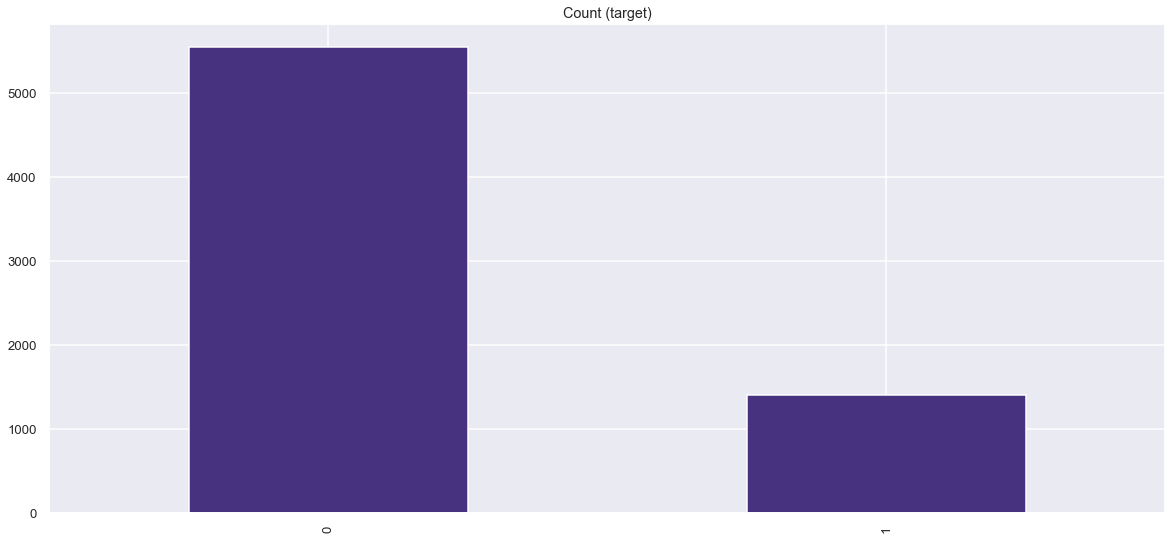

In [114]:
target = no_outliers2['Exited']
target_count = no_outliers2.Exited.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

From the bar chart, we can see that there are considerably less customers who exited in the train data given. 

In [99]:
target.shape

(6956,)

In [265]:
# Class count
count_class_0, count_class_1 = no_outliers2.Exited.value_counts()

# Divide by class
df_class_0 = no_outliers2[no_outliers2['Exited'] == 0]
df_class_1 = no_outliers2[no_outliers2['Exited'] == 1]

Random over-sampling:
1    5552
0    5552
Name: Exited, dtype: int64


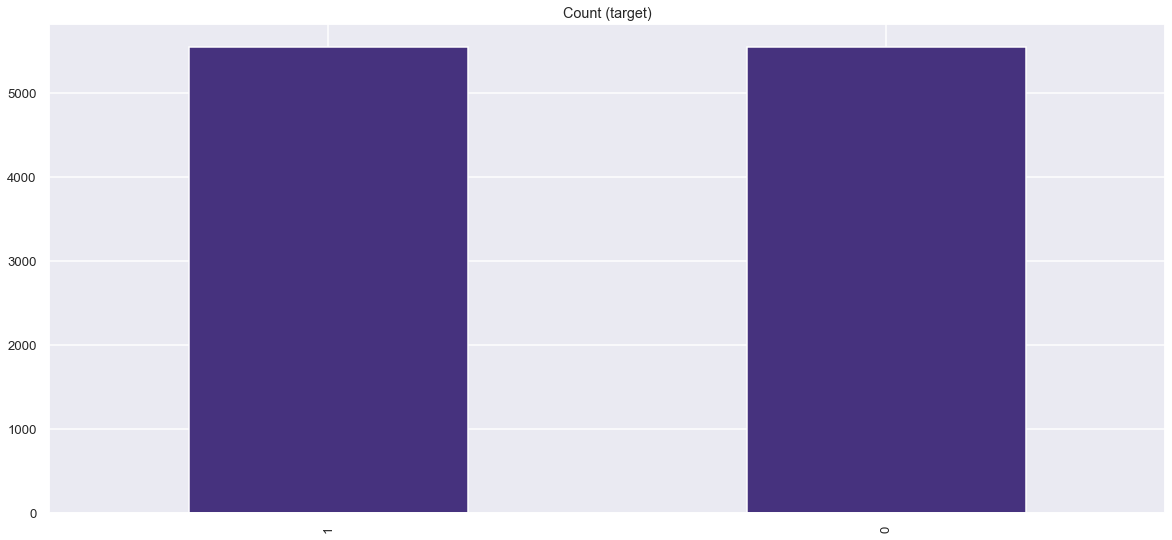

In [266]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Exited.value_counts())

df_test_over.Exited.value_counts().plot(kind='bar', title='Count (target)');

In [102]:
df_test_over.shape

(11104, 14)

In [106]:
df_test_over

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Female,Male,France,Germany,Spain
0,0,601,41,1,0.00,2,0,1,160607.06,1,0,1,0,0
1,0,576,39,1,0.00,2,1,1,68814.23,0,1,1,0,0
2,0,728,69,1,0.00,2,1,1,131804.86,1,0,1,0,0
3,0,640,39,3,0.00,1,1,1,105997.25,0,1,0,0,1
5,0,699,59,3,106819.65,1,0,1,163570.25,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2988,1,608,44,5,126147.84,1,0,1,132424.69,1,0,0,1,0
6440,1,529,38,2,0.00,1,1,0,146388.85,1,0,1,0,0
102,1,770,68,2,183555.24,1,0,0,159557.28,1,0,1,0,0
318,1,405,39,10,0.00,1,1,0,160810.85,0,1,1,0,0


### Under Sampling approach

Random under-sampling:
1    1404
0    1404
Name: Exited, dtype: int64


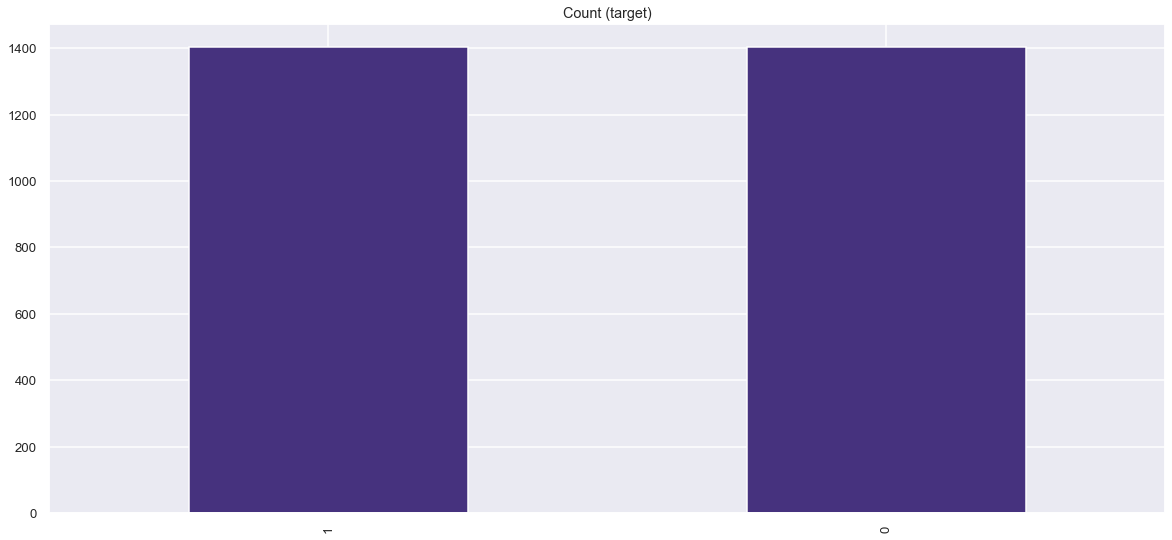

In [116]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Exited.value_counts())

df_test_under.Exited.value_counts().plot(kind='bar', title='Count (target)');

In [264]:
df_test_under.shape

(2808, 14)

In [103]:
#import imblearn

In [ ]:
#from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler()
#df_test_over = ros.fit_sample(X, y)

#print(X_ros.shape[0] - X.shape[0], 'new random picked points')

#plot_2d_space(X_ros, y_ros, 'Random over-sampling')

## Near miss under sampling

In [223]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()

In [242]:
x = no_outliers2[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember','EstimatedSalary', 'Female', 'Male', 'France', 'Germany', 'Spain']]
y = no_outliers2['Exited']

In [267]:
xnm, ynm = nm.fit_resample(x, y)
no_outliers3 = xnm 
target2 = ynm
no_outliers3.shape, target2.shape

((2808, 13), (2808,))

## Features selection for training the machine model
In machine learning and statistics, feature selection, also known as variable selection, attribute selection or variable subset selection, is the process of selecting a subset of relevant features for use in model

<img src='img1.png'/>

##### It is important to note that i used wrapper method(Backward Elimination) and pearson's correlation methods for feature selection
>A wrapper method needs one machine learning algorithm and uses its performance as evaluation criteria. This means, you feed the features to the selected Machine Learning algorithm and based on the model performance you add/remove the features.

#### Negatively coorelated features
- IsActiveMember
- NumOfProducts   
- CreditScore      
- Tenure           
- HasCrCard

In [365]:
# drop target and unecessary columns/labels from train data and assign to Train features for training the model
train_features = no_outliers2.drop(['Exited', 'HasCrCard', 'IsActiveMember', 'Tenure', 'NumOfProducts', 'CreditScore'], axis = 1) # in python, Row 0 column 1 for axis
train_features


,Age,Balance,EstimatedSalary,Female,Male,France,Germany,Spain
0,41,0.00,160607.06,1,0,1,0,0
1,39,0.00,68814.23,0,1,1,0,0
2,69,0.00,131804.86,1,0,1,0,0
3,39,0.00,105997.25,0,1,0,0,1
4,37,108308.11,41788.25,0,1,0,1,0
...,...,...,...,...,...,...,...,...
6995,79,61811.23,104222.80,0,1,1,0,0
6996,41,0.00,94170.84,1,0,1,0,0
6997,38,189443.72,106648.58,0,1,1,0,0
6998,44,142989.69,115452.51,1,0,1,0,0


In [366]:
train_target = no_outliers2['Exited']

In [367]:
# Assigning Customer Id to a variable to use as a unique identifier
CustomerId = test_data['CustomerId']

In [368]:
# drop target and unecessary columns from test data and assign to features
test_features = merged_test.drop(['IsActiveMember', 'HasCrCard', 'Tenure', 'NumOfProducts', 'CreditScore'], axis = 1)
test_features

,Age,Balance,EstimatedSalary,Female,Male,France,Germany,Spain
0,34,0.00,12092.03,0,1,1,0,0
1,56,94231.13,121164.60,0,1,0,0,1
2,43,165048.50,16929.41,0,1,0,1,0
3,59,155766.05,110275.17,0,1,0,0,1
4,36,138992.48,122373.42,0,1,0,1,0
...,...,...,...,...,...,...,...,...
2995,45,110765.68,26163.74,0,1,0,1,0
2996,26,119545.48,65482.94,0,1,0,1,0
2997,39,129068.54,187905.12,1,0,1,0,0
2998,41,122189.66,98301.61,1,0,0,1,0


## Building Machine Learning Models

We are going to be building different models with different machine learning algorithms, and them comparing them to see which one works best. We are going to be building our models with the following algorithms.
- Decision Trees Classifier (Tree)
- Logistic Regression (Linear-model)
- Support Vector Machine (SVM)
- Random Forest Classifier (ensemble)
- Gradient Boosting Classifier (ensemble)
- XGBClassifier(XGboost)
- BaggingClassifier(ensemble)
- KNeighbour (neighbors)
- KNearestNeighbour (neighbors)
- Extra Trees Classifier (ensemble)
- Guassin Naive Bayes Model (naive_bayes)
- AdaBooster Classifier (ensemble)
- LightGBM

#### For Combining Models
>- StackingCV Classifier (mlxtend.classifier)
>- Voting Classifier (ensemble)</br>



# Decision Tree Model
Decision tree algorithm is a type of non-linear classification model, where data points pass through a tree-like process in order to predict an output variable.

In [141]:
#Fitting the Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [162]:
# Using the Decision tree classifier to create a model
classifier1 = DecisionTreeClassifier()
# model = classifier1.fit(train_features, train_target)

In [143]:
#Using the model to make a Prediction
target_pred1 = model.predict(test_features)

In [144]:
prediction1 = pd.DataFrame({'CustomerId': CustomerId, 'Exited': target_pred1})

In [145]:
prediction1.to_csv('initial_prediction.csv', index = False) 

## Logistic Regression
Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable.

In [146]:
from sklearn.linear_model import LogisticRegression
classifier2 = LogisticRegression()
model = classifier2.fit(train_features, train_target)

In [147]:
target_pred2 = model.predict(test_features)

In [148]:
prediction2 = pd.DataFrame({'CustomerId': CustomerId, 'Exited': target_pred2})

In [149]:
prediction2.to_csv('prediction2.csv', index = False) 

## Support vector machine
support-vector machine constructs a hyperplane or set of hyperplanes in a high- or infinite-dimensional space, which can be used for classification, regression, or other tasks like outliers detection.

In [163]:
from sklearn.svm import SVC
classifier3 = SVC(kernel='poly', random_state=0) #support vector model 
model = classifier3.fit(train_features, train_target)

In [38]:
target_pred3 = model.predict(test_features)

In [39]:
prediction3 = pd.DataFrame({'CustomerId': CustomerId, 'Exited': target_pred3})

In [40]:
prediction3.to_csv('prediction3.csv', index = False) 

## Random Forest Classifier
Random forests is a supervised learning algorithm. It can be used both for classification and regression. It is also the most flexible and easy to use algorithm. A forest is comprised of trees. It is said that the more trees it has, the more robust a forest is.

In [300]:
from sklearn.ensemble import RandomForestClassifier
classifier4 = RandomForestClassifier()
# model = classifier3.fit(train_features, train_target)

In [301]:
target_pred4 = model.predict(test_features)

In [302]:
prediction4 = pd.DataFrame({'CustomerId': CustomerId, 'Exited': target_pred4})

In [303]:
prediction4.to_csv('prediction4.csv', index = False) 

## Gradient Boosting algorithm
Gradient boosting is a greedy algorithm and can overfit a training dataset quickly. It can benefit from regularization methods that penalize various parts of the algorithm and generally improve the performance of the algorithm by reducing overfitting.

In [359]:
from sklearn.ensemble import GradientBoostingClassifier
classifier5 = GradientBoostingClassifier()
model = classifier5.fit(train_features, train_target)

In [360]:
#GradientBoostingClassifier?

In [361]:
target_pred5 = model.predict(test_features)

In [362]:
prediction5 = pd.DataFrame({'CustomerId': CustomerId, 'Exited': target_pred5})

In [363]:
prediction5.to_csv('prediction5.csv', index = False)

**This Model gave me the highest score on the leadership board**

## XGBoost
XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. In prediction problems involving unstructured data (images, text, etc.)

In [294]:
import xgboost as xgb

In [295]:
#XGBClassifier?

In [296]:
from xgboost import XGBClassifier
classifier14 = XGBClassifier(use_label_encoder=False)

In [297]:
model = classifier14.fit(train_features, train_target)

[20:58:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [298]:
target_pred14 = model.predict(test_features)

/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [299]:
prediction14 = pd.DataFrame({'CustomerId': CustomerId, 'Exited': target_pred14})
prediction14.to_csv('prediction14.csv', index = False)

## BaggingClassifier
A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction.

In [165]:
from sklearn.ensemble import BaggingClassifier
classifier6 = BaggingClassifier()
# model = classifier6.fit(train_features, train_target)

In [51]:
target_pred6 = model.predict(test_features)
prediction6 = pd.DataFrame({'CustomerId': CustomerId, 'Exited': target_pred6})
prediction6.to_csv('prediction6.csv', index = False)

## KNeighbour
KNN can be used for both classification and regression predictive problems. However, it is more widely used in classification problems in the industry. 

In [52]:
from sklearn.neighbors import KNeighborsClassifier
classifier7 = KNeighborsClassifier()
model = classifier7.fit(train_features, train_target)

In [53]:
target_pred7 = model.predict(test_features)
prediction7 = pd.DataFrame({'CustomerId': CustomerId, 'Exited': target_pred7})
prediction7.to_csv('prediction7.csv', index = False)

### K Nearest Neighbour

In [57]:
from sklearn.neighbors import NearestNeighbors
classifier8 = NearestNeighbors()
model = classifier8.fit(train_features, train_target)

In [58]:
target_pred8 = model.predict(test_features)
prediction8 = pd.DataFrame({'CustomerId': CustomerId, 'Exited': target_pred8})
prediction8.to_csv('prediction8.csv', index = False)

AttributeError: 'NearestNeighbors' object has no attribute 'predict'

## Extra Trees Classifier
This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [166]:
from sklearn.ensemble import ExtraTreesClassifier
classifier9 = ExtraTreesClassifier()
# model = classifier1.fit(train_features, train_target)

In [ ]:
target_pred9 = model.predict(test_features)
prediction9 = pd.DataFrame({'CustomerId': CustomerId, 'Exited': target_pred9})
prediction9.to_csv('prediction8.csv', index = False)

## Gaussian Naive Bayes model
Gaussian Naive Bayes supports continuous valued features and models each as conforming to a Gaussian (normal) distribution. An approach to create a simple model is to assume that the data is described by a Gaussian distribution with no co-variance (independent dimensions) between dimensions.

In [167]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
classifier10 = GaussianNB()
# model = classifier10.fit(train_features, train_target)

In [ ]:
target_pred10 = model.predict(test_features)
prediction10 = pd.DataFrame({'CustomerId': CustomerId, 'Exited': target_pred10})
prediction10.to_csv('prediction10.csv', index = False)

# AdaBooster(Adaptive Boosting)
AdaBoost is an iterative ensemble method. AdaBoost classifier builds a strong classifier by combining multiple poorly performing classifiers so that you will get high accuracy strong classifier. The basic concept behind Adaboost is to set the weights of classifiers and training the data sample in each iteration such that it ensures the accurate predictions of unusual observations.


In [168]:
from sklearn.ensemble import AdaBoostClassifier
classifier11 = AdaBoostClassifier()
# model = classifier11.fit(train_features, train_target)

In [ ]:
target_pred11 = model.predict(test_features)
prediction11 = pd.DataFrame({'CustomerId': CustomerId, 'Exited': target_pred11})
prediction11.to_csv('prediction11.csv', index = False)

## StackingCV Classifier
Stacking is an ensemble learning technique that combines multiple base classification models predictions into a new data set. This new data are treated as the input data for another classifier. This classifier employed to solve this problem. Stacking is often referred to as blending.

In [169]:
from mlxtend.classifier import StackingCVClassifier
# Initializing the StackingCV classifier
sclf = StackingCVClassifier(classifiers = [classifier1, classifier2, classifier3, classifier4],
shuffle = False, use_probas = True,cv = 5, meta_classifier = SVC(probability = True))

In [173]:
# Create list to store classifiers
classifiers = {"ETC": classifier1, 
               "GBa": classifier2, 
               'GNBm':classifier5, 'DT':classifier6, "Stack": sclf}

In [174]:
# Train classifiers
for key in classifiers:
    # Get classifier
    classifier12 = classifiers[key]
    
    # Fit classifier
    classifier12.fit(train_features, train_target)
        
    # Save fitted classifier
    classifiers[key] = classifier12

In [175]:
target_pred12 = classifier12.predict(test_features)
prediction12 = pd.DataFrame({'CustomerId': CustomerId, 'Exited': target_pred12})
prediction12.to_csv('prediction12.csv', index = False)

In [176]:
"RFC": classifier3, "AdaB": classifier4, 'BC': classifier7, 'SVC':classifier8

SyntaxError: invalid syntax (<ipython-input-176-9ce4c8cd968c>, line 1)

# Voting Classifier
The EnsembleVoteClassifier is a meta-classifier for combining similar or conceptually different machine learning classifiers for classification via majority or plurality voting.
>Combining algorithms using the voting classifier

In [173]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

In [174]:
log_clf = ExtraTreesClassifier()
rnd_clf = RandomForestClassifier()
knn_clf = GradientBoostingClassifier()

In [175]:
vot_clf = VotingClassifier(estimators = [('lr', log_clf), ('rnd', rnd_clf), ('knn', knn_clf)], voting = 'hard')

In [176]:
vot_clf.fit(train_features, train_target)

VotingClassifier(estimators=[('lr', ExtraTreesClassifier()),
                             ('rnd', RandomForestClassifier()),
                             ('knn', GradientBoostingClassifier())])

In [177]:
pred = vot_clf.predict(test_features)
pred = pd.DataFrame({'CustomerId': CustomerId, 'Exited': pred})
pred.to_csv('prediction13.csv', index = False)

# LightGBM
LightGBM is a gradient boosting framework that uses tree based learning algorithms. It is designed to be distributed and efficient with the following advantages

In [292]:
import lightgbm as lgb
classifier15 = lgb.LGBMClassifier()
model = classifier15.fit(train_features, train_target)

In [293]:
target_pred15 = classifier15.predict(test_features)
prediction15 = pd.DataFrame({'CustomerId': CustomerId, 'Exited': target_pred15})
prediction15.to_csv('prediction15.csv', index = False)

# Conclusion


- Undertook EDA to descover the important fetures through data visualization, correlation and statistical analysis

- Outliers were detected and removed in other to avoid the machin skew to a prediction that results to overfiting

- I balanced the data set without outliers and it resulted in a lower accuracy on kaggle public leadership board

- Due to the size of the final dataset(After removing outliers, balancing and use of dummy variebles) used to train the model using various algorithms, there seem to be a higher accuracy with boosting classifiers and lower with Linear regressor classifiers and neighbors.




